### Problem One: Select features and categories for practice



In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)


iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
import pandas as pd

# extract the data
iris_data = iris["data"]


# rename the columns of iris_data for easy access
iris_data.columns = ["_".join(col.split(" ")[:2]) for col in iris_data.columns]

# make a slice of the data comprising of sepal_length and petal_length only and concatenate it with the target data
df = pd.concat([iris_data[["sepal_length", "petal_length"]], iris["target"]], axis=1)

# query the dataframe for versicolor and virginica (targets 1 and 2 respectively)
df = df.query("target == 1 or target == 2").reset_index(drop=True)
df

,sepal_length,petal_length,target
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1
...,...,...,...
95,6.7,5.2,2
96,6.3,5.0,2
97,6.5,5.2,2
98,6.2,5.4,2


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

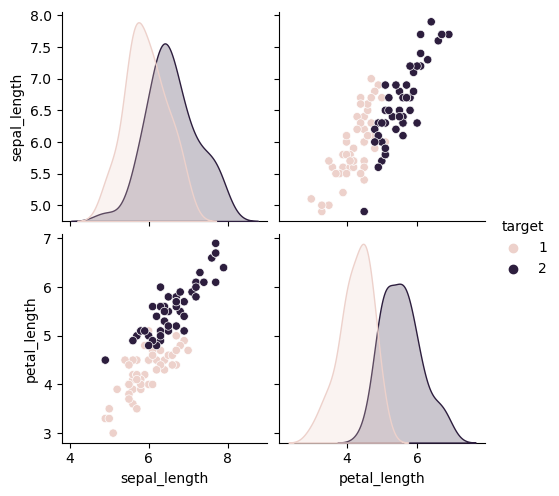

In [4]:
sns.pairplot(df, hue="target")

### Problem Two: Data analysis

In [5]:
df.head()

,sepal_length,petal_length,target
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   target        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.describe()

,sepal_length,petal_length,target
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


In [8]:
for specie in df.target.unique():
    num_samples = sum(df["target"] == specie)
    print(f"The total number of samples for specie {specie}: {num_samples}")

The total number of samples for specie 1: 50
The total number of samples for specie 2: 50


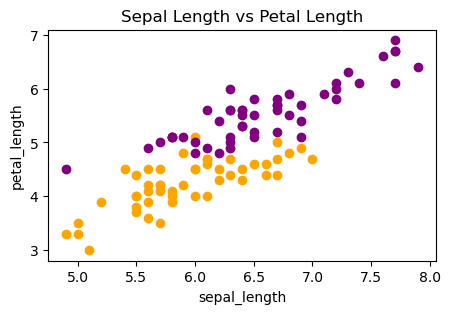

In [9]:
# show a scatter plot of the extracted data
%matplotlib inline

plt.figure(figsize=(5,3))
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.title("Sepal Length vs Petal Length")
plt.scatter(df[df["target"]==1]["sepal_length"], df[df["target"]==1]["petal_length"], c="orange")

plt.scatter(df[df["target"]==2]["sepal_length"], df[df["target"]==2]["petal_length"], c="purple")
plt.show()

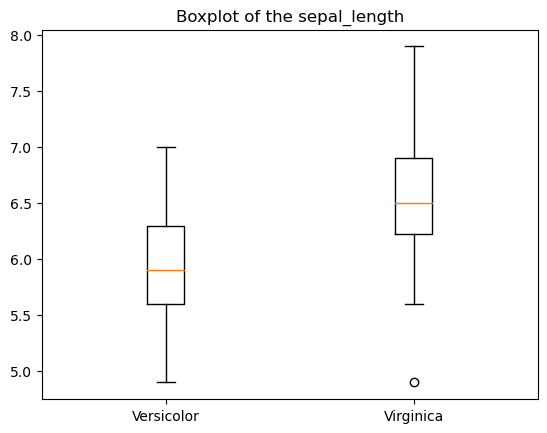

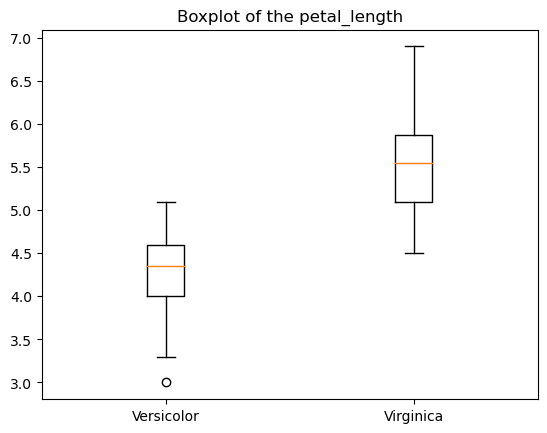

In [10]:
# show a box plot of the extracted data


for feature in df.columns[:-1]:
    versicolor = df[df["target"]==1][feature]
    virginica = df[df["target"]==2][feature]
    
    
    plt.boxplot([versicolor, virginica])
    plt.title(f"Boxplot of the {feature}")
    plt.xticks([1,2], ["Versicolor", "Virginica"])
    plt.show()

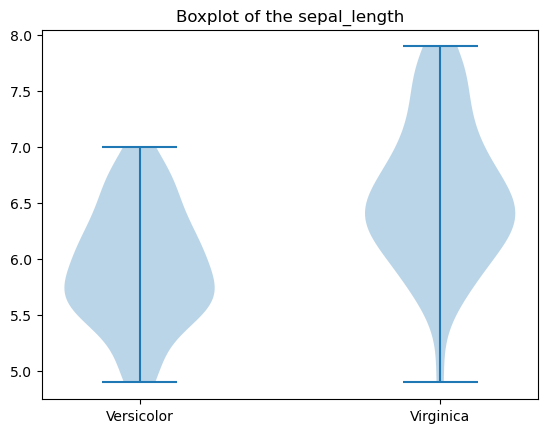

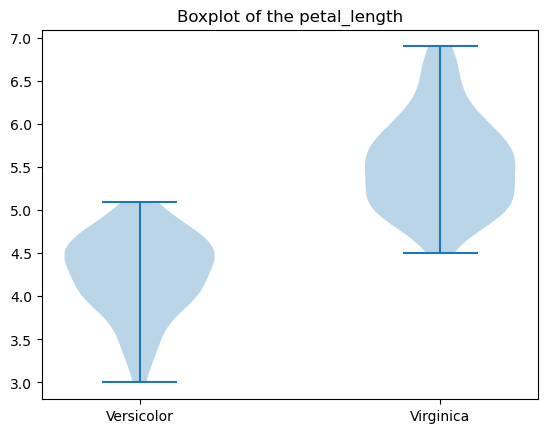

In [11]:
# show a violin plot of the extracted data


for feature in df.columns[:-1]:
    versicolor = df[df["target"]==1][feature]
    virginica = df[df["target"]==2][feature]
    
    
    plt.violinplot([versicolor, virginica])
    plt.title(f"Boxplot of the {feature}")
    plt.xticks([1,2], ["Versicolor", "Virginica"])
    plt.show()

### Problem Three: Division of preprocessing/training data and verification data

In [12]:
X = df[["sepal_length", "petal_length"]].to_numpy()
y = df["target"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Problem  Four: Pretreatment/Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
# Learn mean and standard deviation from training data
scaler.fit(X_train)

# Apply scaling to training data
X_train_transformed = scaler.transform(X_train)

# Apply the same scaling to test data
X_test_transformed = scaler.transform(X_test)

### Problem Five: Learning and estimation

In [16]:
from warnings import simplefilter
from sklearn.neighbors import KNeighborsClassifier



simplefilter(action='ignore', category=FutureWarning)


knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_transformed, y_train)
pred5 = knn5.predict(X_test_transformed)

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_transformed, y_train)
pred1 = knn1.predict(X_test_transformed)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_transformed, y_train)
pred3 = knn3.predict(X_test_transformed)


print(pred5)
print(pred1)
print(pred3)


[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


### Problem Six: Evaluation

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = {"knn5": pred5, "knn1": pred1, "knn3": pred3}

for key in predictions:
    print(f"Prediction Metrics for {key}")
    
    print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions[key]) * 100)
    print("Precision: ", precision_score(y_true=y_test, y_pred=predictions[key], average=None))
    print("Recall: ", recall_score(y_true=y_test, y_pred=predictions[key], average=None))
    print("F1: ", f1_score(y_true=y_test, y_pred=predictions[key], average=None))
    print("Confusion Matrix: ", confusion_matrix(y_true=y_test, y_pred=predictions[key]))

Prediction Metrics for knn5
Accuracy:  80.0
Precision:  [0.76470588 0.875     ]
Recall:  [0.92857143 0.63636364]
F1:  [0.83870968 0.73684211]
Confusion Matrix:  [[13  1]
 [ 4  7]]
Prediction Metrics for knn1
Accuracy:  80.0
Precision:  [0.8 0.8]
Recall:  [0.85714286 0.72727273]
F1:  [0.82758621 0.76190476]
Confusion Matrix:  [[12  2]
 [ 3  8]]
Prediction Metrics for knn3
Accuracy:  80.0
Precision:  [0.8 0.8]
Recall:  [0.85714286 0.72727273]
F1:  [0.82758621 0.76190476]
Confusion Matrix:  [[12  2]
 [ 3  8]]


### Summary of Research on Metrics

**Accuracy:**

- It measures the overall correctness of a model's predictions.
- Calculated as: (True Positives + True Negatives) / Total Predictions
- Caution should be taken when dealing with imbalanced datasets where one class is much more frequent than the other.

**Precision:**

- It measures the proportion of positive predictions that are actually correct.
- Calculated das: True Positives / (True Positives + False Positives)
- It's crucial when the cost of false positives is high (e.g., predicting someone has a disease when they don't).

**Recall:**

- It measures the proportion of actual positives that are correctly identified.
- Calculated as: True Positives / (True Positives + False Negatives)
- It's critical when the cost of false negatives is high (e.g., failing to detect a fraud transaction).

**F1 Score:**

- It combines precision and recall into a single metric, balancing their importance.
- Calculated as: 2 * (Precision * Recall) / (Precision + Recall)
- It's helpful when there is need to consider both precision and recall equally.

**Understanding Trade-offs:**

- Increasing precision often decreases recall, and vice versa.
- It is ideal to choose metrics based on the specific problem and the relative costs of false positives and false negatives.

### Problem Seven: Visualization

KNeighborsClassifier()


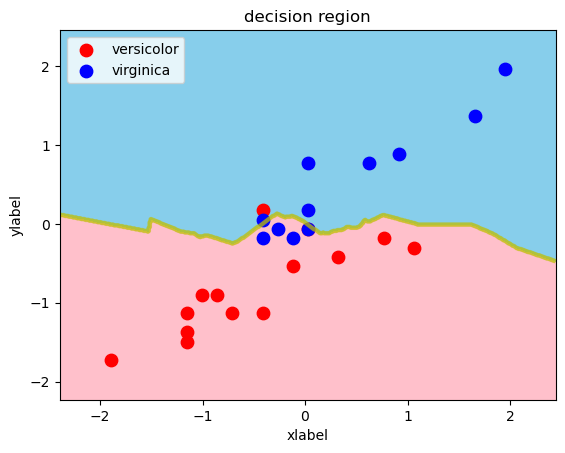

KNeighborsClassifier(n_neighbors=1)


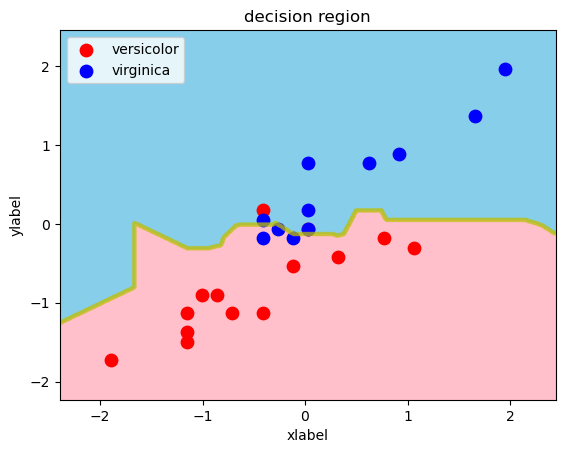

KNeighborsClassifier(n_neighbors=3)


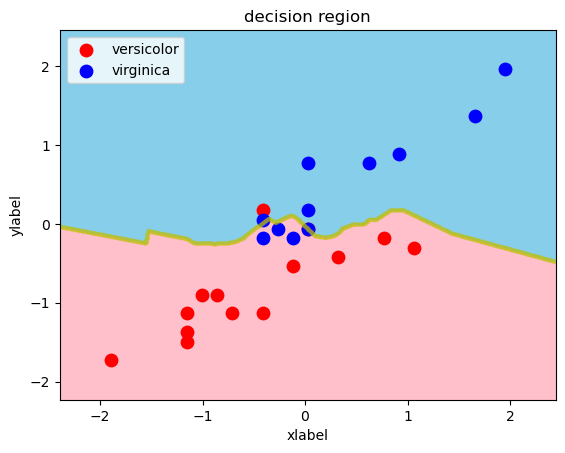

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

knns = [knn5, knn1, knn3]

for model in knns:
    print(model)
    decision_region(X_test_transformed, y_test, model)

### Problem Eight: Learning by other methods

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Learning by KNN
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

In [21]:
# Learning by Logistic Regression
logr = LogisticRegression()
logr.fit(X_train_transformed, y_train)
y_pred_logr = logr.predict(X_test_transformed)

In [22]:
# Learning by SVM
svm = SVC()
svm.fit(X_train_transformed, y_train)
y_pred_svm = svm.predict(X_test_transformed)

In [23]:
# Learning by Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_transformed, y_train)
y_pred_dtree = dtree.predict(X_test_transformed)

In [24]:
# Learning by Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train_transformed, y_train)
y_pred_forest = forest.predict(X_test_transformed)

In [25]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


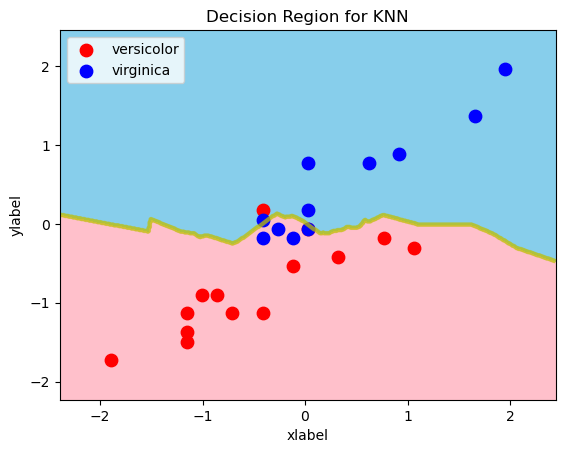

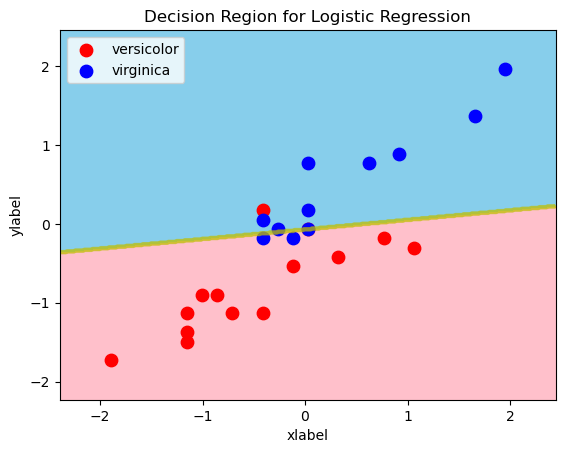

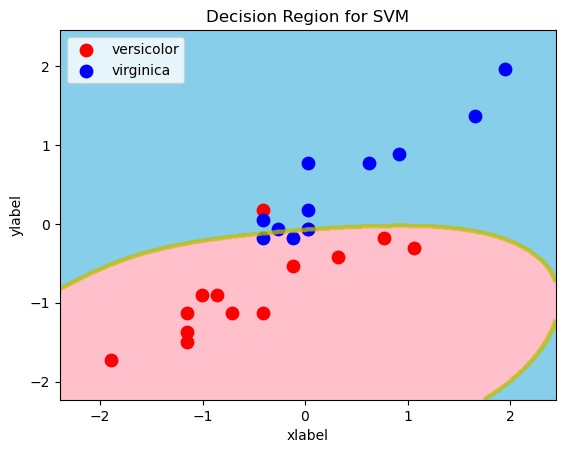

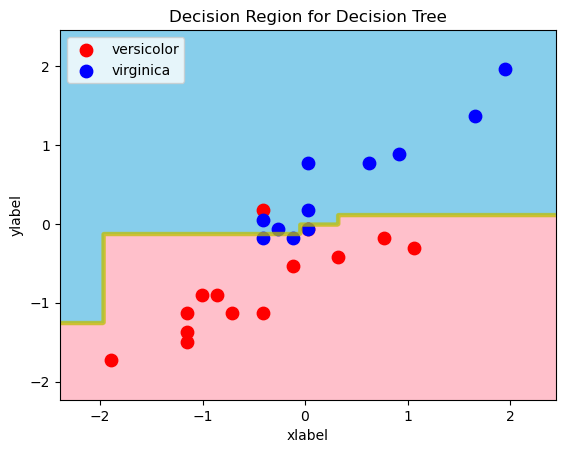

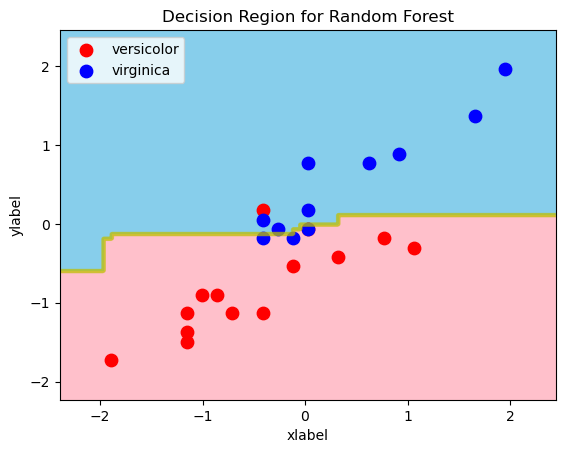

Model,Accuracy,Precision,Recall,F1,Confusion Matrix
KNN,80.0,[0.76470588 0.875 ],[0.92857143 0.63636364],[0.83870968 0.73684211],[[13 1] [ 4 7]]
Logistic Regression,84.0,[0.85714286 0.81818182],[0.85714286 0.81818182],[0.85714286 0.81818182],[[12 2] [ 2 9]]
SVM,84.0,[0.85714286 0.81818182],[0.85714286 0.81818182],[0.85714286 0.81818182],[[12 2] [ 2 9]]
Decision Tree,84.0,[0.8125 0.88888889],[0.92857143 0.72727273],[0.86666667 0.8 ],[[13 1] [ 3 8]]
Random Forest,84.0,[0.8125 0.88888889],[0.92857143 0.72727273],[0.86666667 0.8 ],[[13 1] [ 3 8]]


In [26]:
from prettytable import PrettyTable


def eval_models(is_std=True):
    # Evaluation of the different models
    models = [knn, logr, svm, dtree, forest]
    predictions = {
        "KNN": y_pred_knn, 
        "Logistic Regression": y_pred_logr, 
        "SVM": y_pred_svm, 
        "Decision Tree": y_pred_dtree, 
        "Random Forest": y_pred_forest}

    pt = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1", "Confusion Matrix"])

    for index, key in enumerate(predictions):
        accuracy = accuracy_score(y_true=y_test, y_pred=predictions[key]) * 100
        precision = precision_score(y_true=y_test, y_pred=predictions[key], average=None)
        recall = recall_score(y_true=y_test, y_pred=predictions[key], average=None)
        f1 = f1_score(y_true=y_test, y_pred=predictions[key], average=None)
        confusion_mat = confusion_matrix(y_true=y_test, y_pred=predictions[key])

        pt.add_row([key, accuracy, precision, recall, f1, confusion_mat])
        
        if is_std == False:
            X = X_test
        else:
            X = X_test_transformed
        decision_region(X, y_test, models[index], title=f"Decision Region for {key}")
    return pt
    
    
display(eval_models())

#### Summary

Here's an analysis of the best-performing models based on each metric and a label of the kind of decision area it was:
  

**Accuracy:**
Top performers: Logistic Regression, SVM, Decision Tree, and Random Forest (all with 84.0%)  
Least accurate: KNN (80.0%)

**Precision:**
Top performers based on Class 0: KNN (0.92857143)  
Top performers based on Class 1: Logistic Regression, SVM (both with 0.81818182), and Decision Tree and Random Forest (both with 0.88888889)

**Recall:**
Top performers based on Class 0: Logistic Regression and SVM (both with 0.85714286)  
Top performers based on Class 1: KNN (0.875)

**F1 Score:**
Top performers based on Class 0: KNN (0.83870968)
Top performers based on Class 1: Logistic Regression, SVM, and Random Forest (all with 0.8) 

  
Logistic Regression and SVM have the most balanced performance across all metrics, with consistent scores for both classes. KNN excels in precision for both classes, but its accuracy and recall are slightly lower. Decision Tree and Random Forest offer good recall, especially for Class 1, but their precision for Class 1 is slightly lower than Logistic Regression and SVM.



**Decision Area**  
KNN: Non-linear  
Logistic Regression: Linear  
SVM: Non-linear  
Decision Tree: Non-linear  
Random Forest: Non-linear 

### Problem Nine: (Advanced task) Comparison with and without standardization

**Note:** It is advised to run the cells of this notebook in parallel to avoid errors due to variable name collision when running/rerunning problem eight or problem nine.

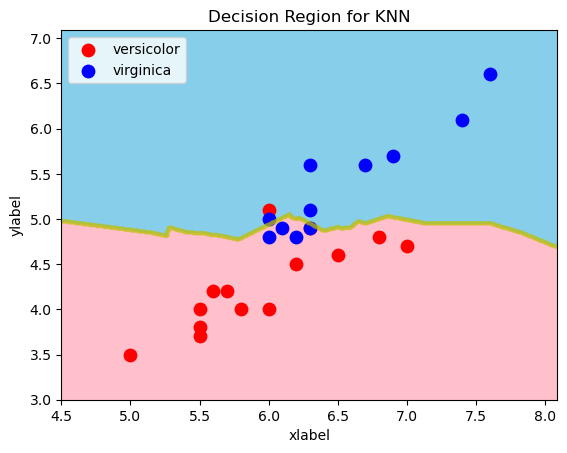

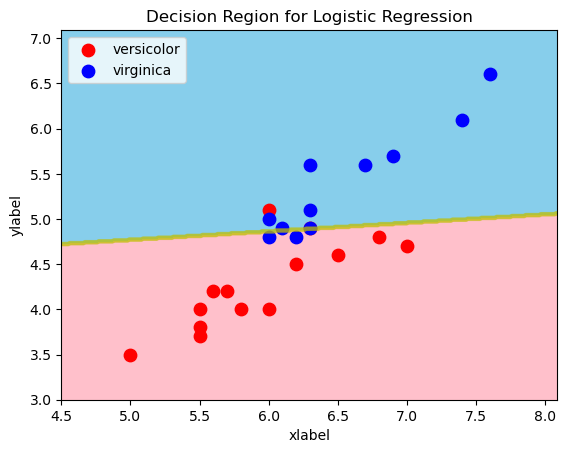

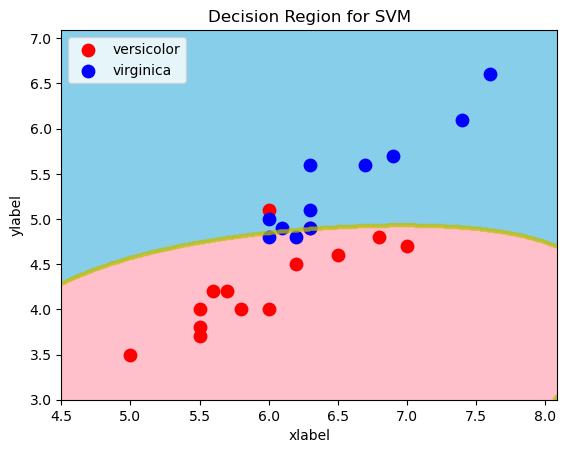

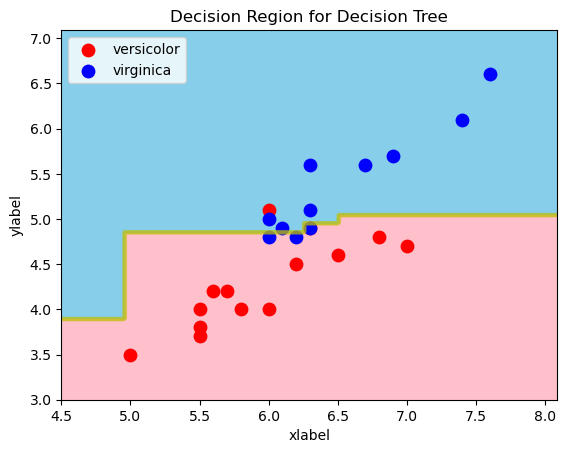

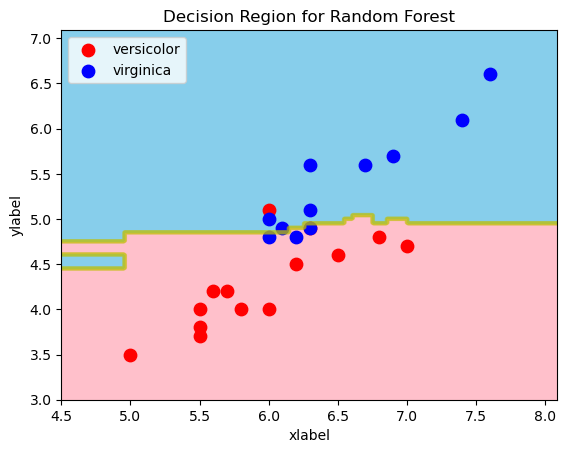

Model,Accuracy,Precision,Recall,F1,Confusion Matrix
KNN,80.0,[0.76470588 0.875 ],[0.92857143 0.63636364],[0.83870968 0.73684211],[[13 1] [ 4 7]]
Logistic Regression,84.0,[0.85714286 0.81818182],[0.85714286 0.81818182],[0.85714286 0.81818182],[[12 2] [ 2 9]]
SVM,84.0,[0.85714286 0.81818182],[0.85714286 0.81818182],[0.85714286 0.81818182],[[12 2] [ 2 9]]
Decision Tree,84.0,[0.8125 0.88888889],[0.92857143 0.72727273],[0.86666667 0.8 ],[[13 1] [ 3 8]]
Random Forest,84.0,[0.8125 0.88888889],[0.92857143 0.72727273],[0.86666667 0.8 ],[[13 1] [ 3 8]]


In [27]:
# Learning by KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Learning by Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)

# Learning by SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Learning by Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Learning by Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

display(eval_models(is_std=False))

### Comparing the Results

**Standardized Data**    

**Accuracy:** Logistic Regression, SVM, Decision Tree, and Random Forest all achieve the highest accuracy of 84.0%.  
**Precision:** KNN has the highest precision for both classes.  
**Recall:** Logistic Regression and SVM have the highest recall for Class 0, while KNN has the highest recall for Class 1.  
**F1 Score:** KNN has the highest F1 score for Class 0, while Logistic Regression, SVM, and Random Forest have the highest F1 score for Class 1.  
  

**Non-Standardized Data**  
  
  
**Accuracy:** Logistic Regression, SVM, and Decision Tree still achieve 84.0% accuracy, but Random Forest drops to 80.0%.  
**Precision:** No significant changes in precision for most models.  
**Recall:** No significant changes in recall for most models.  
**F1 Score:** No significant changes in F1 score for most models.  


**Key Observations:**  
Standardization generally improves or maintains performance: It doesn't negatively impact any model's performance.
Random Forest is most affected by standardization: Its accuracy drops from 84.0% to 80.0% without standardization.
Distance-based algorithms (KNN) can be particularly sensitive to feature scaling: However, in this case, standardization doesn't significantly impact KNN's performance.

### Problem Ten: (Advance assignment) Highly accurate method using all objective variables

In [28]:
X_new = iris_data[["sepal_length", "petal_length"]].to_numpy()
y_new = iris["target"]

In [29]:
# Split the dataset into train and test batches
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

# create an instance of th Standard_Scaler class and fit it to X_train2 
scaler2 = StandardScaler()
scaler2.fit(X_train2)

# Apply scaling to training data
X_train_transformed2 = scaler.transform(X_train2)

# Apply the same scaling to the test data
X_test_transformed2 = scaler.transform(X_test2)

In [30]:
# Learning by KNN
knn = KNeighborsClassifier()
knn.fit(X_train_transformed2, y_train2)
y_pred_knn = knn.predict(X_test_transformed2)

# Learning by Logistic Regression
logr = LogisticRegression()
logr.fit(X_train_transformed2, y_train2)
y_pred_logr = logr.predict(X_test_transformed2)

# Learning by SVM
svm = SVC()
svm.fit(X_train_transformed2, y_train2)
y_pred_svm = svm.predict(X_test_transformed2)

# Learning by Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_transformed2, y_train2)
y_pred_dtree = dtree.predict(X_test_transformed2)

# Learning by Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train_transformed2, y_train2)
y_pred_forest = forest.predict(X_test_transformed2)



In [31]:
def decision_region_multi(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=[ 'setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

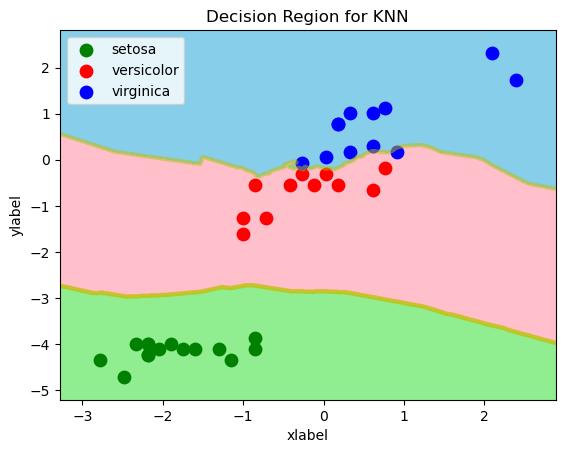

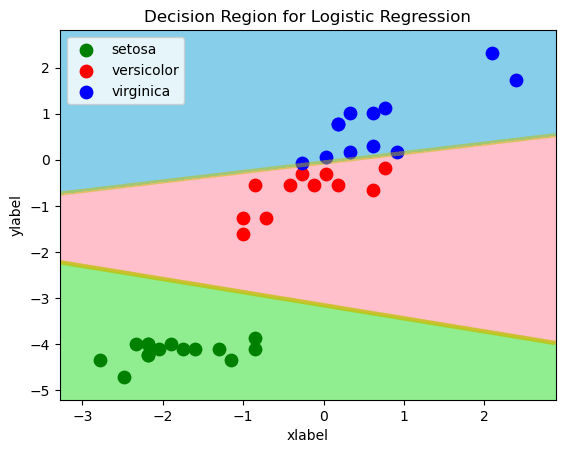

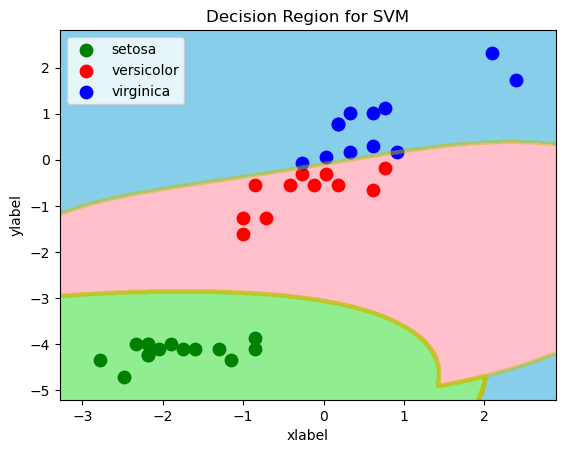

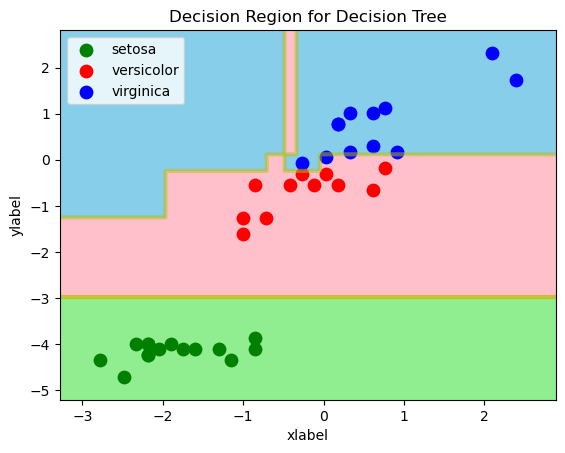

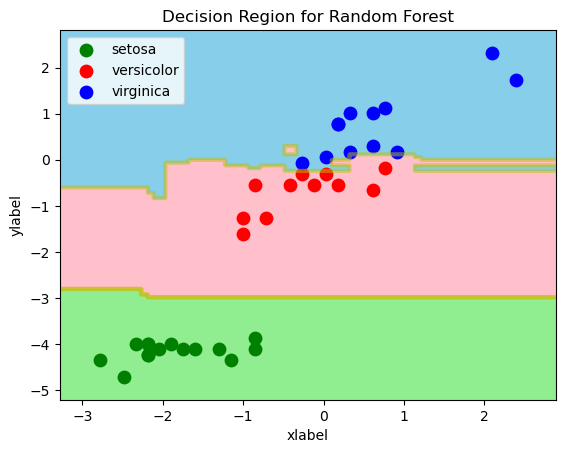

Model,Accuracy,Precision (Micro),Recall (Micro),F1 (Micro),Precision (Macro),Recall (Macro),F1 (Macro),Confusion Matrix
KNN,97.36842105263158,[1. 0.91666667 1. ],0.9736842105263158,0.9736842105263158,0.9722222222222222,0.9722222222222222,0.9710144927536232,[[15 0 0] [ 0 11 0] [ 0 1 11]]
Logistic Regression,100.0,[1. 1. 1.],1.0,1.0,1.0,1.0,1.0,[[15 0 0] [ 0 11 0] [ 0 0 12]]
SVM,100.0,[1. 1. 1.],1.0,1.0,1.0,1.0,1.0,[[15 0 0] [ 0 11 0] [ 0 0 12]]
Decision Tree,97.36842105263158,[1. 0.91666667 1. ],0.9736842105263158,0.9736842105263158,0.9722222222222222,0.9722222222222222,0.9710144927536232,[[15 0 0] [ 0 11 0] [ 0 1 11]]
Random Forest,100.0,[1. 1. 1.],1.0,1.0,1.0,1.0,1.0,[[15 0 0] [ 0 11 0] [ 0 0 12]]


In [32]:
models = [knn, logr, svm, dtree, forest]
predictions = {
    "KNN": y_pred_knn, 
    "Logistic Regression": y_pred_logr, 
    "SVM": y_pred_svm, 
    "Decision Tree": y_pred_dtree, 
    "Random Forest": y_pred_forest}

pt2 = PrettyTable(["Model", "Accuracy", "Precision (Micro)", "Recall (Micro)", "F1 (Micro)",
                    "Precision (Macro)", "Recall (Macro)", "F1 (Macro)", "Confusion Matrix"])

for index, key in enumerate(predictions):
    accuracy = accuracy_score(y_true=y_test2, y_pred=predictions[key]) * 100

    # Calculate scores with micro-averaging
    precision_micro = precision_score(y_true=y_test2, y_pred=predictions[key], average=None)
    recall_micro = recall_score(y_true=y_test2, y_pred=predictions[key], average='micro')
    f1_micro = f1_score(y_true=y_test2, y_pred=predictions[key], average='micro')

    # Calculate scores with macro-averaging
    precision_macro = precision_score(y_true=y_test2, y_pred=predictions[key], average='macro')
    recall_macro = recall_score(y_true=y_test2, y_pred=predictions[key], average='macro')
    f1_macro = f1_score(y_true=y_test2, y_pred=predictions[key], average='macro')

    confusion_mat = confusion_matrix(y_true=y_test2, y_pred=predictions[key])

    pt2.add_row([key, accuracy, precision_micro, recall_micro, f1_micro,
                  precision_macro, recall_macro, f1_macro, confusion_mat])

    decision_region_multi(X_test_transformed2, y_test2, models[index], title=f"Decision Region for {key}")
    
display(pt2)

### Conclusion  
All five models had a tremendous increase in performance with the addition of a third objective variable. Logistic Regression, SVM, and Random Forest achieved perfect scores (100%)-- on all metrics-- in multi-value classification, surpassing their binary classification performance. While KNN and Decision Tree saw major increases in accuracy (from 84% to 97.4%), demonstrating adaptability.